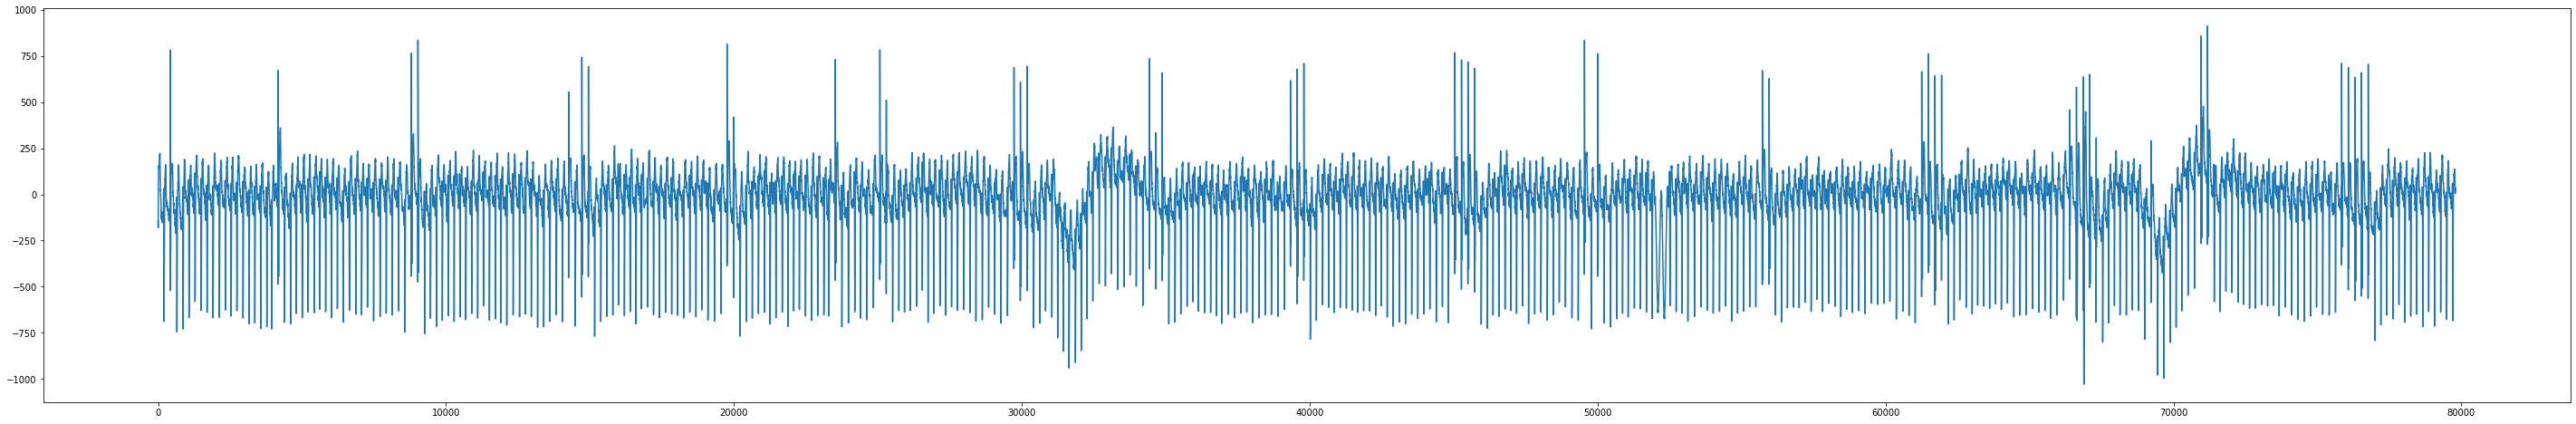

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = '../data-sets/KDD-Cup/data/'
df = pd.read_csv(BASE_PATH + '001_UCR_Anomaly_35000.txt', names=['values'])

plt.figure(figsize=[50, 8])
plt.plot(df['values'])

In [2]:
def low_pass(freq, cut_off):
    return np.concatenate((freq[:cut_off], [0 + 0j for _ in range(len(freq) - cut_off)]))

def high_pass(freq, cut_off):
    return np.concatenate(([0 + 0j for _ in range(cut_off)], freq[cut_off:]))

<Figure size 3600x576 with 0 Axes>

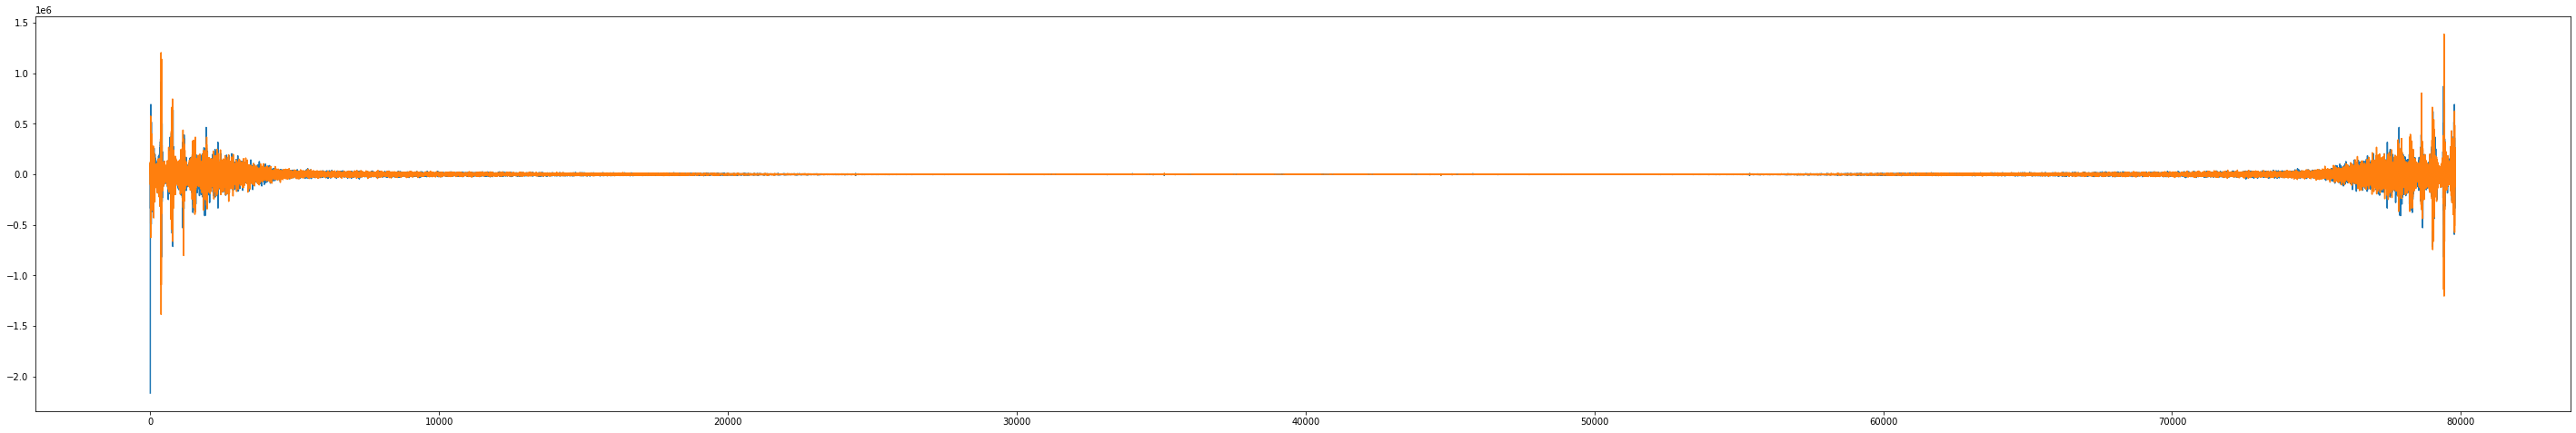

In [3]:
from scipy.fft import fft, ifft
import numpy as np

plt.figure(figsize=[50, 8])

out = fft(df['values'].values)

real = [o.real for o in out]
imag = [o.imag for o in out]
plt.figure(figsize=[50, 8])
plt.plot(real)
plt.plot(imag)

D:\Python\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


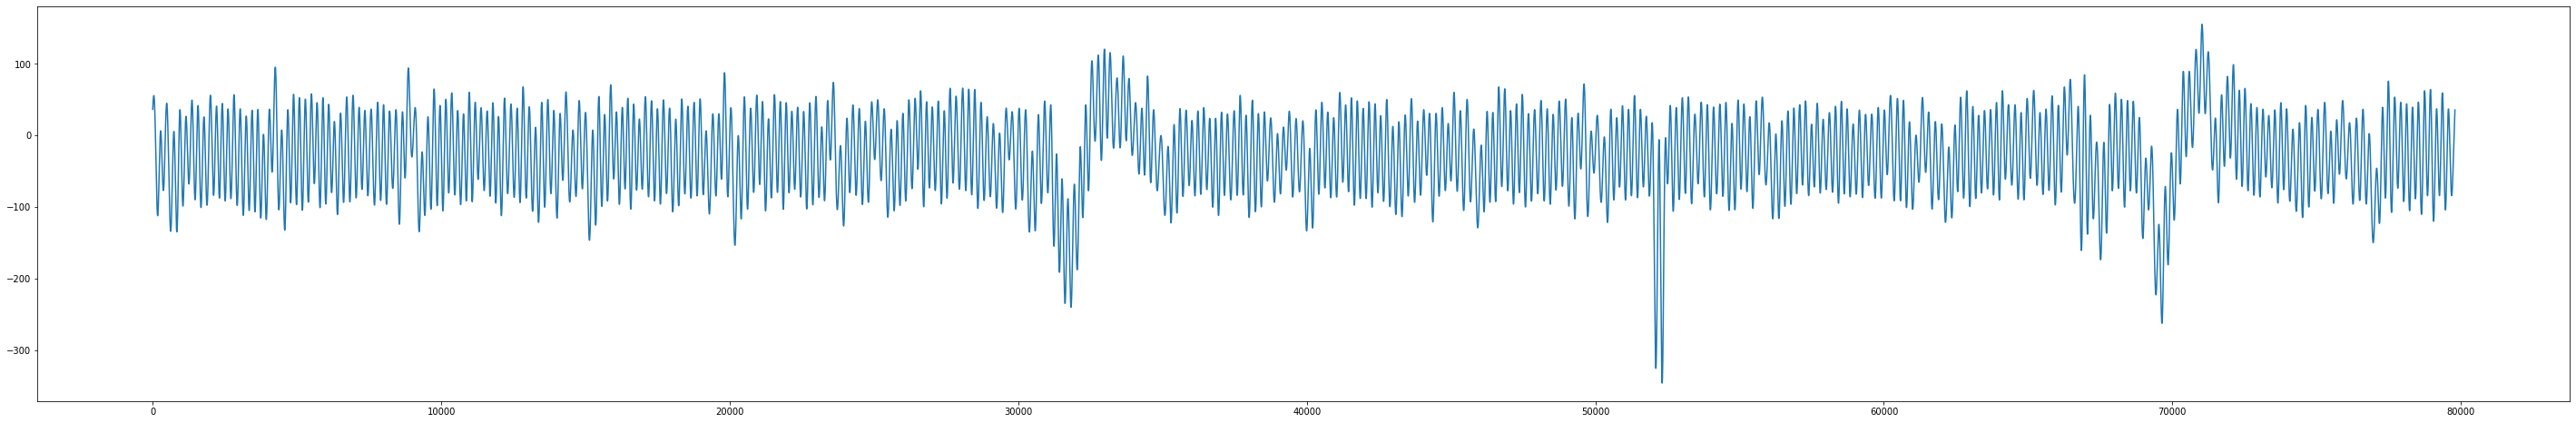

In [5]:
out = low_pass(out, 500)
inv = ifft(out)
plt.figure(figsize=[50, 8])
plt.plot(inv)